# Time Series:

# Exponential Smoothing Technique:

### Importing libraries:

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

# Reading and Understanding Data:

In [199]:
df_air = pd.read_csv('airline-passenger-traffic.csv',header=None)

In [200]:
df_air.columns = ['Months','Passengers']

In [201]:
df_air.head()

,Months,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [202]:
df_air.shape

(144, 2)

In [203]:
df_air.describe()

,Passengers
count,140.000000
mean,280.735714
std,120.593235
min,104.000000
25%,180.000000
50%,268.000000
75%,360.500000
max,622.000000


In [204]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Months      144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [205]:
df_air.dtypes

Months         object
Passengers    float64
dtype: object

#### Converting into DateTime Series:

In [206]:
df_air['Months'] = pd.to_datetime(df_air['Months'],format='%Y-%m')

In [207]:
df_air = df_air.set_index('Months')

In [208]:
df_air.head()

,Passengers
Months,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Time Series Analysis:

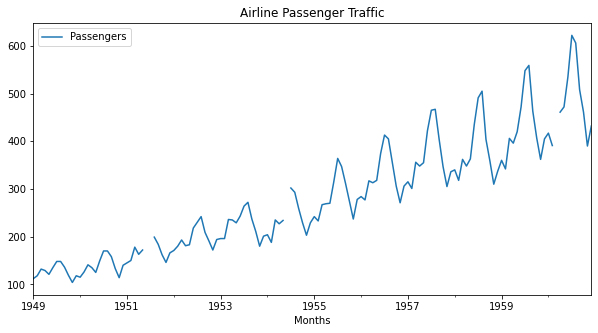

In [209]:
# plottig time series data:

df_air.plot(figsize=(10,5))
plt.title('Airline Passenger Traffic')
plt.show()

#### Observation :-
- Looking at the graph above, we can say that it is missing in the graph.
- also we can say that in time series data Trend and Seasonality is present.

###  Missing Value Treatment:
- 1.Mean Imputation
- 2.Linear Interpolation
- 3.Using Last Observation carried forward

In [210]:
# 1. Mean imputation
df_air_mean = pd.read_csv('airline-passenger-traffic.csv')
df_air_mean.columns = ['Months','Passengers']
df_air_mean['Months'] = df_air_mean['Months'].astype('datetime64[ns]')
df_air_mean.set_index('Months',inplace=True)

In [211]:
df_air_mean['Passengers'].fillna(df_air_mean['Passengers'].mean(),inplace=True)

In [212]:
df_air_mean.isnull().sum()

Passengers    0
dtype: int64

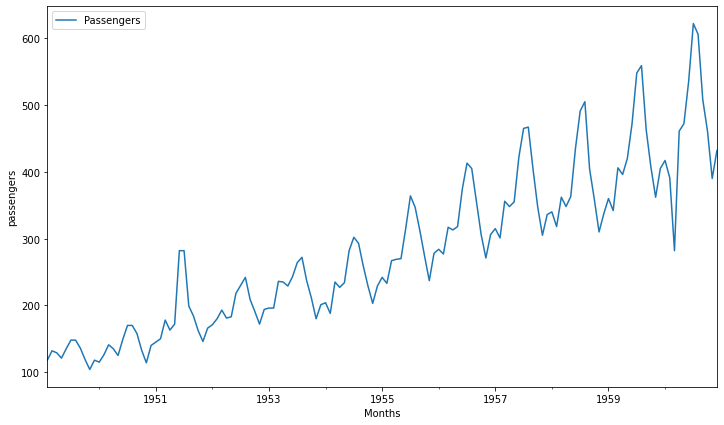

In [213]:
# Plot the graph
df_air_mean.plot(figsize=(12,7))
plt.xlabel('Months')
plt.ylabel('passengers')
plt.show()

In [214]:
# 2. Using Linear interpolation
df_air['Passengers'].fillna(df_air['Passengers'].interpolate(method='linear'),inplace=True)

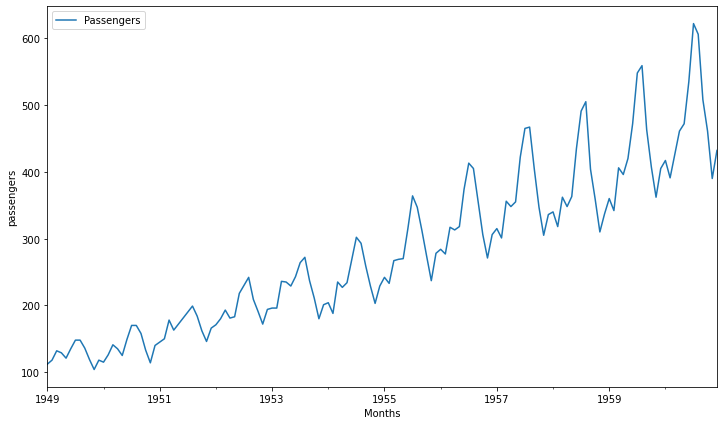

In [215]:
# Plot the graph
df_air.plot(figsize=(12,7))
plt.xlabel('Months')
plt.ylabel('passengers')
plt.show()

In [216]:
# 3. Using Last Observation carried forward
df_air_last = pd.read_csv('airline-passenger-traffic.csv')
df_air_last.columns = ['Months','Passengers']
df_air_last['Months'] = df_air_last['Months'].astype('datetime64[ns]')
df_air_last.set_index('Months',inplace=True)

In [217]:
# Here in method we use pad, ffill, bfill
df_air_last['Passengers'].fillna(method = 'pad',inplace=True)

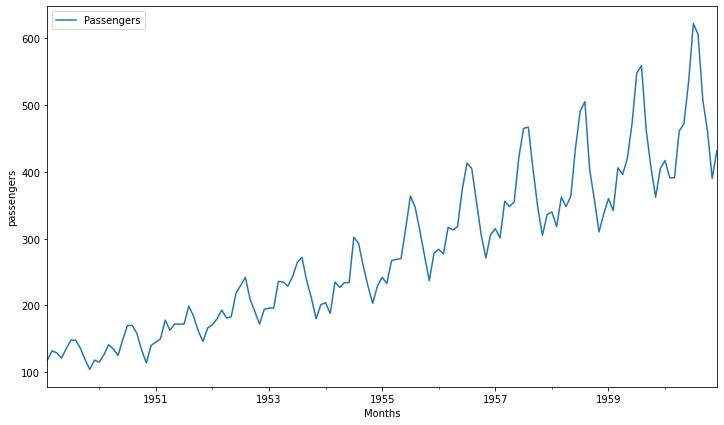

In [218]:
# Plot the graph
df_air_last.plot(figsize=(12,7))
plt.xlabel('Months')
plt.ylabel('passengers')
plt.show()

### Observation :-
- Here we use LInear interpolation for missing value treatment bcz here in data trend is present.

# Handling Outliers

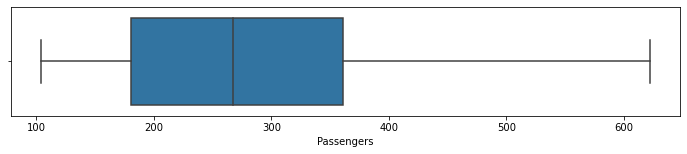

In [219]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df_air['Passengers'], whis=1.5)

<AxesSubplot:>

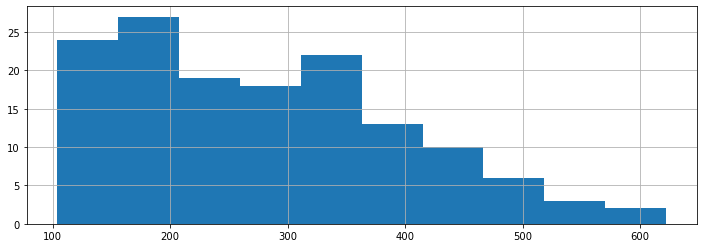

In [220]:
# Histogram plot

df_air['Passengers'].hist(figsize=(12,4))

# Time Series Decomposition 

### Additive decomposition

In [221]:
from statsmodels.api import tsa

<Figure size 864x576 with 0 Axes>

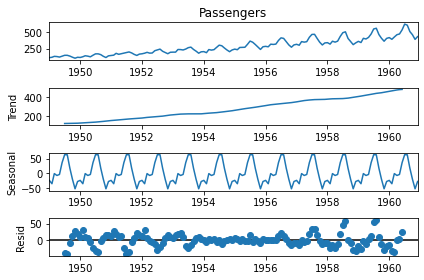

In [222]:
plt.figure(figsize=(12,8))
decomposiotion_add = tsa.seasonal_decompose(df_air.Passengers , model='additive') # additive seasonal index
decomposiotion_add.plot()
plt.show()

### Multiplicative Seasonal Decomposition

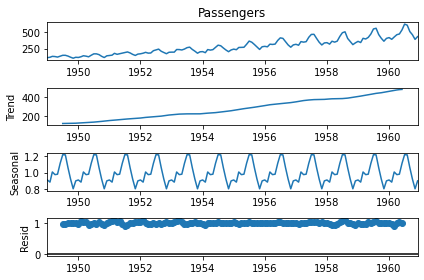

In [223]:
decomposiotion_mul = tsa.seasonal_decompose(df_air.Passengers , model='multiplicative') # multiplicative seasonal index
decomposiotion_mul.plot()
plt.show()

### Observation :-
- From Residual we can say that the series is Multiplicative.
- Here in series Trens is present.

- If only trend is present then you can go for relavent method like Simple moving average, Holt's method.
- If trend and Season is present then you can go for relavent method like Holt's method, Holt's Winter or AR tech.

# Built And Evaluate 

### Split data into training and test set 

In [224]:
train_len = 120
train = df_air[0:train_len] # frist 120 months as training set
test = df_air[train_len:] # remaining 24 months as test set

In [225]:
y_pred = train['Passengers'][train_len-1]
y_pred

337.0

In [226]:
# adding new column to dataset:

train['y_pred']=y_pred

In [227]:
train.head()

,Passengers,y_pred
Months,,
1949-01-01,112.0,337.0
1949-02-01,118.0,337.0
1949-03-01,132.0,337.0
1949-04-01,129.0,337.0
1949-05-01,121.0,337.0


# Simple time series method

### 1.Naive method
- last observation carried froward

In [228]:
df_naive = test.copy()

In [229]:
df_naive['Naive_forecast'] = train['Passengers'][train_len-1]

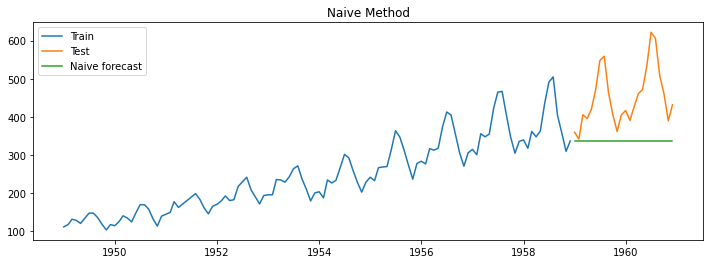

In [230]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(df_naive['Naive_forecast'],label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [231]:
from sklearn.metrics import mean_squared_error

In [232]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],df_naive['Naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-df_naive['Naive_forecast'])/test['Passengers'])*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 137.51
MAPE : 23.63


### 2.Simple average method
- Average of data carried froward

In [233]:
df_avr = test.copy()

In [234]:
df_avr['Avg_forecast'] = train['Passengers'].mean()

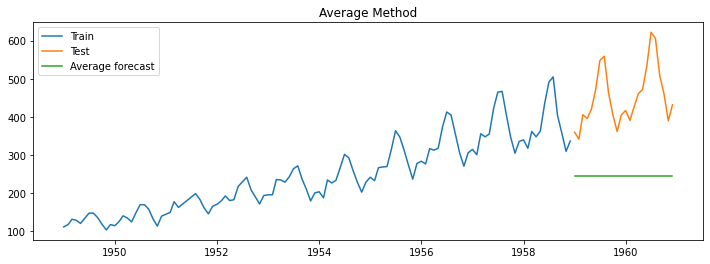

In [235]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(df_avr['Avg_forecast'],label='Average forecast')
plt.legend(loc='best')
plt.title('Average Method')
plt.show()

### Calculate RMSE and MAPE

In [236]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],df_avr['Avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-df_avr['Avg_forecast'])/test['Passengers'])*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 219.69
MAPE : 44.28


### 3.Moving average method
- Average of each window carried forward

In [237]:
df_moving_avg = test.copy()
ma_window = 12

In [238]:
# calculating average of moving window
df_moving_avg['Moving_avg_forecast'] = df_air['Passengers'].rolling(ma_window).mean()

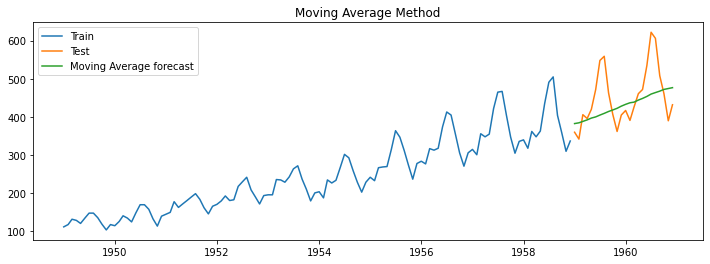

In [239]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(df_moving_avg['Moving_avg_forecast'],label='Moving Average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [240]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],df_moving_avg['Moving_avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-df_moving_avg['Moving_avg_forecast'])/test['Passengers'])*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 72.23
MAPE : 11.16


# Exponential Smoothing Technique:

### 1. Simple Exponential Smoothing Technique:

In [241]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_simple_exp = SimpleExpSmoothing(train['Passengers'])
model_fit = model_simple_exp.fit(smoothing_level=0.2,optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [242]:
y_pred_simple_exp = test.copy()
y_pred_simple_exp['simple_exp_forecast'] = model_fit.forecast(24)

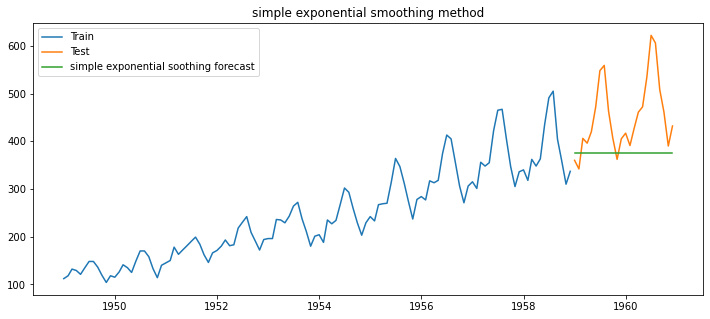

In [243]:
plt.figure(figsize=(12,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_pred_simple_exp['simple_exp_forecast'], label='simple exponential soothing forecast')
plt.title('simple exponential smoothing method')
plt.legend(loc='best')
plt.show()

#### Calculate RMSE and MAPE

In [244]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_pred_simple_exp['simple_exp_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_pred_simple_exp['simple_exp_forecast'])/test['Passengers'])*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 107.65
MAPE : 16.49


### 2. Double [Holt's] Exponential Smoothing Technique:

In [245]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [246]:
model_Holt_exp = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='multiplicative', seasonal=None)

In [247]:
model_fit = model_Holt_exp.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)

In [248]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 1.0535714285714286,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [249]:
y_pred_Holt_exp = test.copy()
y_pred_Holt_exp['Double_exp_forecast']=model_fit.forecast(24)

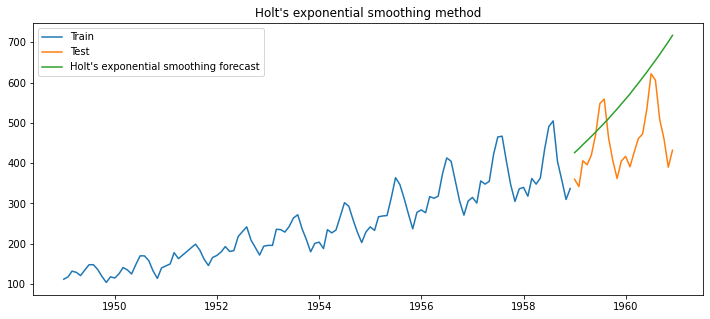

In [250]:
plt.figure(figsize=(12,5))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_pred_Holt_exp['Double_exp_forecast'], label='Holt\'s exponential smoothing forecast')
plt.title('Holt\'s exponential smoothing method')
plt.legend(loc='best')
plt.show()

### Calculating RMSE and MAPE

In [251]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_pred_Holt_exp['Double_exp_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_pred_Holt_exp['Double_exp_forecast'])/test['Passengers'])*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 140.81
MAPE : 27.4


### 3. Holt's [triple] Winters Exponential Smoothing Technique:

In [266]:
model_holt_winters = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='mul')

In [267]:
model_holt_winters = model_holt_winters.fit(optimized=True)

In [268]:
model_holt_winters.params

{'smoothing_level': 0.36560134495266067,
 'smoothing_trend': 7.489928501326008e-08,
 'smoothing_seasonal': 0.6343986338861402,
 'damping_trend': nan,
 'initial_level': 181.82559739589655,
 'initial_trend': 3.9382349110286974,
 'initial_seasons': array([0.60291256, 0.63418164, 0.69707084, 0.66268612, 0.61166196,
        0.66888968, 0.72737822, 0.72244074, 0.65902387, 0.57429037,
        0.51056163, 0.58903508]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [269]:
y_pred_Holt_winter = test.copy()
y_pred_Holt_winter['Holt_winter_forecast'] = model_holt_winters.forecast(24)

### Calculating RMSE and MAPE

In [271]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_pred_Holt_winter['Holt_winter_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_pred_Holt_winter['Holt_winter_forecast'])/test['Passengers'])*100,2)
print('RMSE :',rmse)
print('MAPE :',mape)

RMSE : 32.45
MAPE : 6.45
